# What is Tidy Data?

In this course, it is expected that your data is organized in some kind of tidy format. In short, a [tidy dataset](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) is a tabular dataset where:

- each variable is a column
- each observation is a row
- each type of observational unit is a table

The first three images below depict a tidy dataset. This tidy dataset is in the field of healthcare and has two tables: one for patients (with their patient ID, name, and age) and one for treatments (with patient ID, what drug that patient is taking, and the dose of that drug).

![Each variable in a tidy dataset must have its own column](./imgs/tidy-data-one.png)  
*Each variable in a tidy dataset must have its own column*

![Each observation in a tidy dataset must have its own row](./imgs/tidy-data-two.png)  
*Each observation in a tidy dataset must have its own row*

![Each observational unit in a tidy dataset must have its own table](./imgs/tidy-data-three.png)  
*Each observational unit in a tidy dataset must have its own table*


The next image depicts the same data but in one representation of a non-tidy format (there are other possible non-tidy representations). The Drug A, Drug B, and Drug C columns should form one 'Drug' column, since this is one variable. The entire table should be separated into two tables: a patients table and a treatments table.


![Only the second rule of tidy data is satisfied in this non-tidy representation of the above data: each observation forms a row](./imgs/tidy-data-four.png)  
*Only the second rule of tidy data is satisfied in this non-tidy representation of the above data: each observation forms a row*


While the data provided to you in the course will all be tidy, in practice, you may need to perform tidying work before exploration. You should be comfortable with reshaping your data or perform transformations to split or combine features in your data, resulting in new data columns. These operations collectively are called data-wrangling.

This is also not to say that tidy data is the only useful form that data can take. In fact, as you work with a dataset, you might need to summarize it in a non-tidy form in order to generate appropriate visualizations. You'll see one ## Example of this (bivariate plotting) in the next lesson, where categorical counts need to put into a matrix form in order to create a heat map.


## Recommended Read
Refer to the [Data Wrangling with pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) for a summary of functions helpful for data-wrangling.


# Bar Charts

## Example 1. Create a vertical bar chart using `Seaborn`, with default colors

In [23]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the csv file, and check its top 10 rows
pokemon = pd.read_csv('./data/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   
5   6   charizard              1     1.7    90.5              240   fire   
6   7    squirtle              1     0.5     9.0               63  water   
7   8   wartortle              1     1.0    22.5              142  water   
8   9   blastoise              1     1.6    85.5              239  water   
9  10    caterpie              1     0.3     2.9               39    bug   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  poison  60      62       63     60              80               80  
2  poison  80      82       83     80             100              100  
3     NaN  39      52       43     65              60               50  
4     NaN  58      64       58     80              80               65  
5  flying  78      84       78    100             109               85  
6     NaN  44      48       65     43              50               64  
7     NaN  59      63       80     58              65               80  
8     NaN  79      83      100     78              85              105  
9     NaN  45      30       35     45              20               20

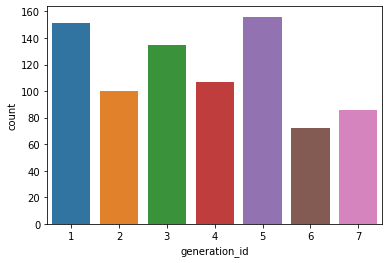

In [24]:
# A semicolon (;) at the end of the statement will supress printing the plotting information
sb.countplot(data=pokemon, x='generation_id');

## Example 2. Create a vertical bar chart using `Seaborn`, with a uniform single color

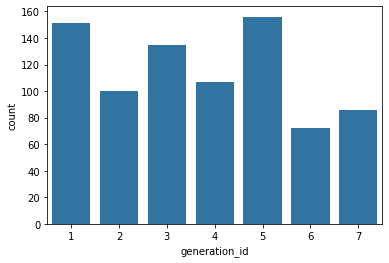

In [6]:
# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

# Use the `color` argument
sb.countplot(data=pokemon, x='generation_id', color=base_color);

## Example 3. Create a vertical bar chart using `Matplotlib`, with a uniform single color

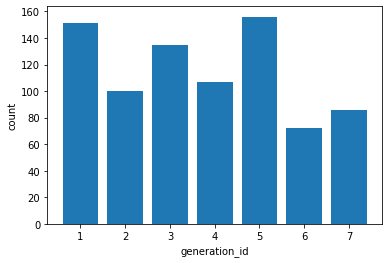

In [7]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

## Example 4. Static and dynamic ordering of the bars in a bar chart using `seaborn.countplot()`

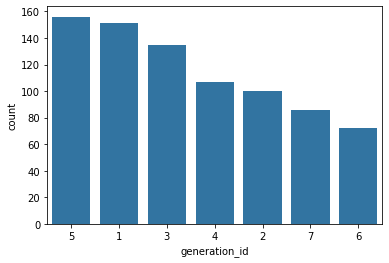

In [8]:
# Static-ordering the bars
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=[5,1,3,4,2,7,6]);

# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series
freq = pokemon['generation_id'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

## Example 5. Rotate the category labels (not axes)

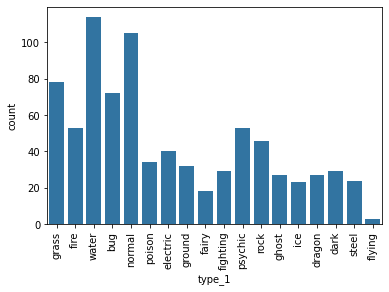

In [10]:
# Plot the Pokemon type on a Vertical bar chart
sb.countplot(data=pokemon, x='type_1', color=base_color);

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

## Example 6. Rotate the axes clockwise

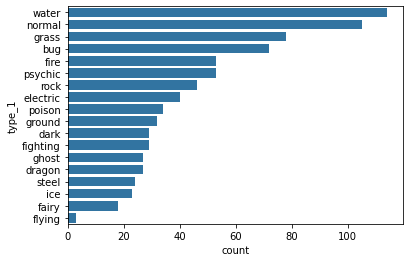

In [11]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

# Absolute vs. Relative Frequency

## Example 1. Demonstrate data wrangling, and plot a horizontal bar chart.

In [12]:
# Data wrangling to reshape the pokemon dataframe
pkmn_types = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')
pkmn_types.head(10)

id     species type_level   type
0   1   bulbasaur     type_1  grass
1   2     ivysaur     type_1  grass
2   3    venusaur     type_1  grass
3   4  charmander     type_1   fire
4   5  charmeleon     type_1   fire
5   6   charizard     type_1   fire
6   7    squirtle     type_1  water
7   8   wartortle     type_1  water
8   9   blastoise     type_1  water
9  10    caterpie     type_1    bug

In [13]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [14]:
# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

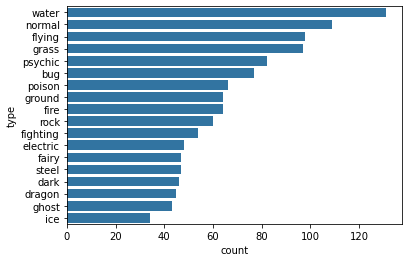

In [15]:
# Plot the horizontal bar charts
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

## Example 2. Plot a bar chart having the proportions, instead of the actual count, on one of the axes.

### step 1. Find the maximum proportion of bar

In [16]:
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


### step 2. Create an array of evenly spaced proportioned values

In [17]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a ### step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

### step 3. Create a list of String values that can be used as tick labels.

In [18]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

### step 4. Plot the bar chart, with new x-tick labels

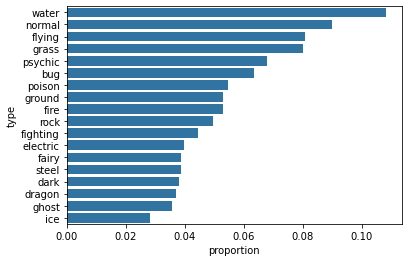

In [19]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

## Example 3. Print the text (proportion) on the bars of a horizontal plot.

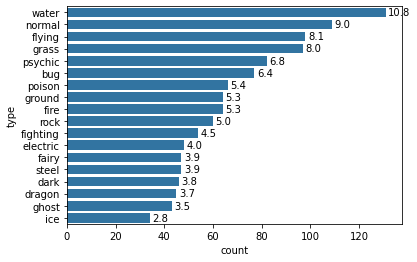

In [20]:
# Considering the same chart from the ## Example 1 above, print the text (proportion) on the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

## Example 4. Print the text (proportion) below the bars of a Vertical plot.

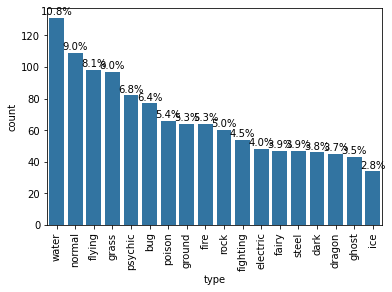

In [21]:
# Considering the same chart from the ## Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

# Counting Missing Data

### step 1. Load the dataset

In [27]:
# Read the data from a CSV file
# Original source of data: https://www.kaggle.com/manjeetsingh/retaildataset available under C0 1.0 Universal (CC0 1.0) Public Domain Dedication License
sales_data = pd.read_csv('./data/sales-data.csv')
sales_data.head(10)

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   
5      1  12/03/2010        57.79       2.667        NaN        NaN   
6      1  19/03/2010        54.58       2.720        NaN        NaN   
7      1  26/03/2010        51.45       2.732        NaN        NaN   
8      1  02/04/2010        62.27       2.719        NaN        NaN   
9      1  09/04/2010        65.86       2.770        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  
5        NaN        NaN        NaN  211.380643         8.106      False  
6        NaN        NaN        NaN  211.215635         8.106      False  
7        NaN        NaN        NaN  211.018042         8.106      False  
8        NaN        NaN        NaN  210.820450         7.808      False  
9        NaN        NaN        NaN  210.622857         7.808      False

In [28]:
sales_data.shape

(8190, 12)

In [33]:
# Use either of the functions below
sales_data.isna()
# sales_data.isnull()

Store   Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0     False  False        False       False       True       True       True   
1     False  False        False       False       True       True       True   
2     False  False        False       False       True       True       True   
3     False  False        False       False       True       True       True   
4     False  False        False       False       True       True       True   
...     ...    ...          ...         ...        ...        ...        ...   
8185  False  False        False       False      False      False      False   
8186  False  False        False       False      False      False      False   
8187  False  False        False       False      False      False      False   
8188  False  False        False       False      False      False      False   
8189  False  False        False       False      False      False      False   

      MarkDown4  MarkDown5    CPI  Unemployment  IsHoliday  
0          True       True  False         False      False  
1          True       True  False         False      False  
2          True       True  False         False      False  
3          True       True  False         False      False  
4          True       True  False         False      False  
...         ...        ...    ...           ...        ...  
8185      False      False   True          True      False  
8186      False      False   True          True      False  
8187      False      False   True          True      False  
8188      False      False   True          True      False  
8189      False      False   True          True      False  

[8190 rows x 12 columns]

In [30]:
sales_data.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

### step 2 - Prepare a NaN tabular data

In [31]:
# Let's drop the column that do not have any NaN/None values
na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price'], axis=1).isna().sum()
print(na_counts)

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


### step 3 - Plot the bar chart from the NaN tabular data, and also print values on each bar

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


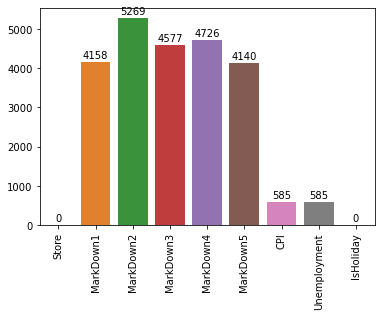

In [34]:
# The first argument to the function below contains the x-values (column names), the second argument the y-values (our counts).
# Refer to the syntax and more ## Example here - https://seaborn.pydata.org/generated/seaborn.barplot.html
sb.barplot(na_counts.index.values, na_counts)

# get the current tick locations and labels
plt.xticks(rotation=90) 

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+300, count, ha='center', va='top')

# Pie Charts

## Example 1. Plot a simple Pie chart

In [40]:
sorted_counts.index

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

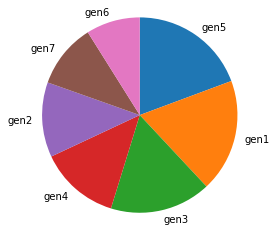

In [60]:
# Use the same pokemon dataset
sorted_counts = pokemon['generation_id'].value_counts()

names = 'gen' + sorted_counts.index.astype('str')
plt.pie(sorted_counts, labels = names, startangle = 90, counterclock = False);
# plt.pie(sorted_counts, labels=sorted_counts.index, labeldistance=1.15);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square');

## Example 2. Plot a simple Donut plot

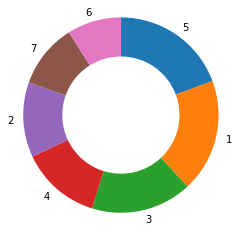

In [62]:
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

# Histograms

## Example 1. Plot a default histogram

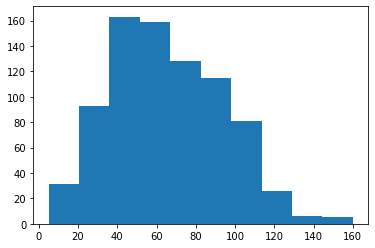

In [64]:
# We have intentionally not put a semicolon at the end of the statement below to see the bar-width
plt.hist(data = pokemon, x = 'speed');

## Example 2. Histogram with fixed number of bins

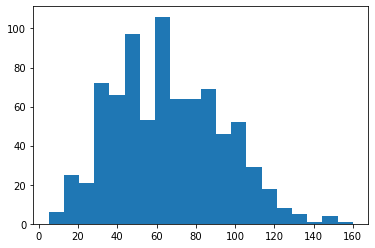

In [65]:
plt.hist(data = pokemon, x = 'speed', bins = 20);

## Example 3. Histogram with dynamic number of bins

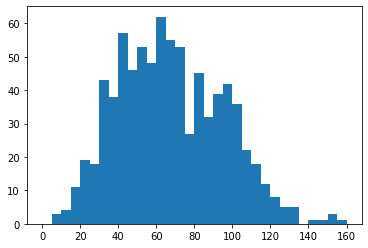

In [67]:
# Create bins with ### step-size 5
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

## Example 4. Plot the similar histogram with `Seaborn's distplot()`

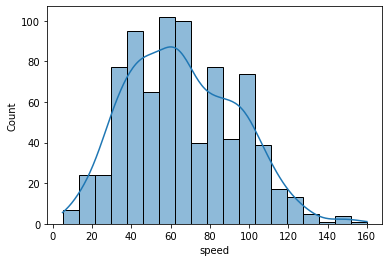

In [77]:
sb.histplot(pokemon['speed'], kde=True);

<AxesSubplot:xlabel='speed', ylabel='Count'>

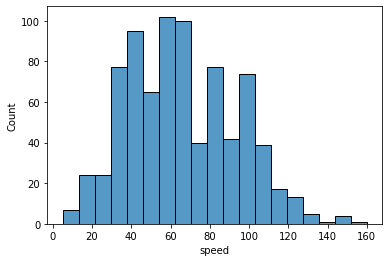

In [75]:
# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sb.histplot(pokemon['speed'], kde=False)

## Example 5. Plot two histograms side-by-side

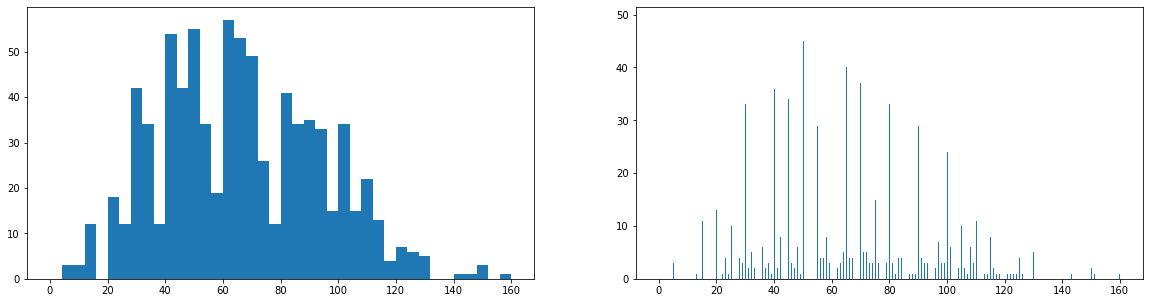

In [79]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, ## Example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, ## Example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# Figures, Axes, and Subplots

![]('./imgs/subplots.png')

## Example 1. Demonstrate `figure.add_axes()` and `axes.hist()`

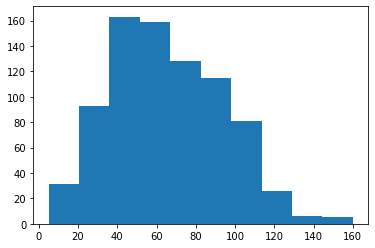

In [81]:
# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

## Example 2. Use axes with `seaborn.countplot()`

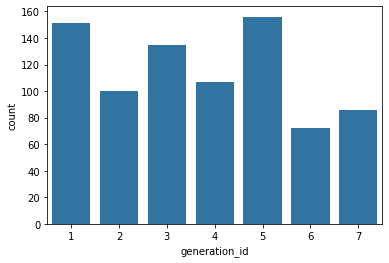

In [83]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax);

## Example 3. Sub-plots

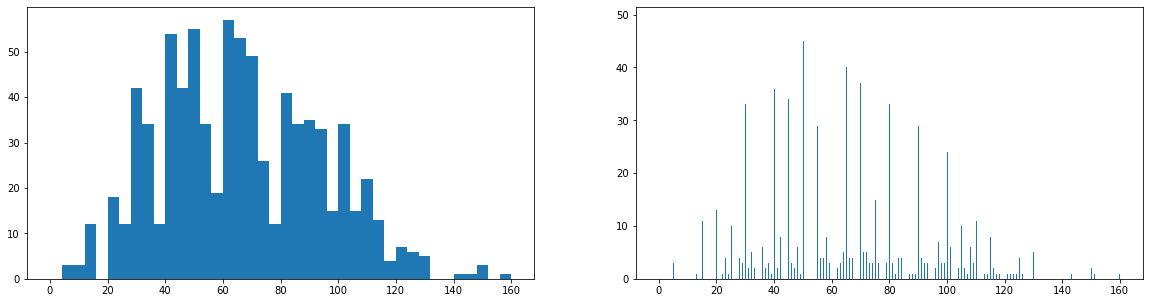

In [84]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, ## Example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, ## Example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

*What if we remove one statement `plt.subplot(1, 2, 2)` from the above code block, and just ran the rest of the lines? What would the outcome plot look like?*

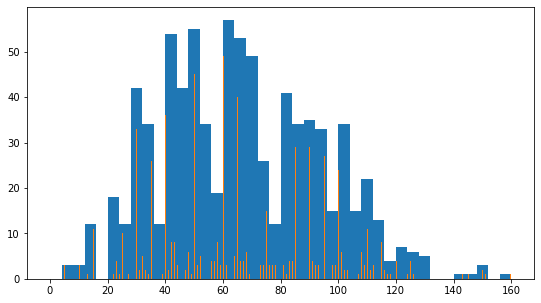

In [87]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, ## Example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, ## Example of too-small bin size
# plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

## Example 4. Demonstrate `pyplot.sca()` and `pyplot.text()` to generate a grid of subplots

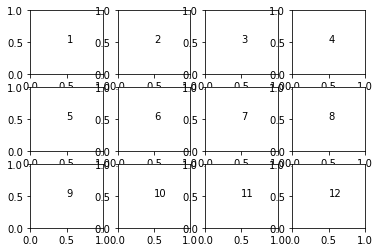

In [88]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

# Choosing a Plot for Discrete Data

Preparatory ### step

In [89]:
die_rolls = pd.read_csv('./data/die-rolls.csv')

# A fair dice has six-faces having numbers [1-6]. 
# There are 100 dices, and two trials were conducted.
# In each trial, all 100 dices were rolled down, and the outcome [1-6] was recorded.
# The `Sum` column represents the sum of the outcomes in the two trials, for each given dice. 
die_rolls.head(10)

Dice  Trial 1  Trial 2  Sum
0     1        4        1    5
1     2        4        5    9
2     3        2        6    8
3     4        6        3    9
4     5        3        6    9
5     6        6        6   12
6     7        3        3    6
7     8        3        2    5
8     9        2        6    8
9    10        6        6   12

## Example 1. Shifting the edges of the bars can remove ambiguity in the case of Discrete data

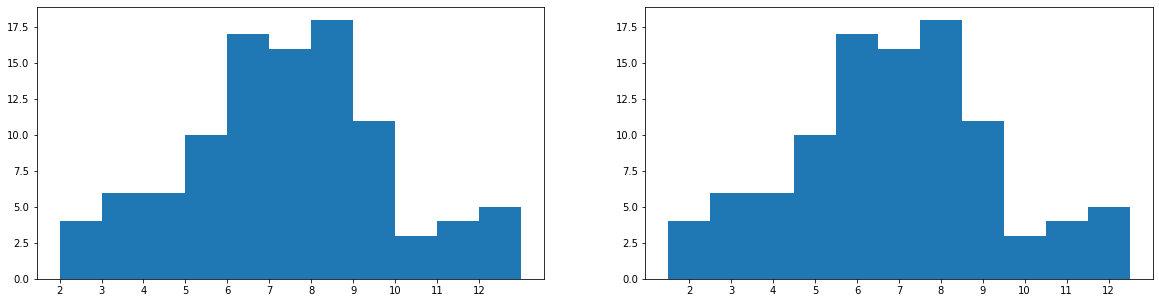

In [90]:
plt.figure(figsize = [20, 5])

# Histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(data=die_rolls, x='Sum', bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));


# Histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(data=die_rolls, x='Sum', bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));

## Example 2. Making gaps between individual bars

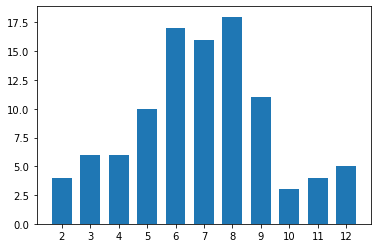

In [96]:
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(data=die_rolls, x='Sum', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1));

# Descriptive Statistics, Outliers and Axis Limits

## Example 1. Plot the histogram from the data having a skewed distribution of values

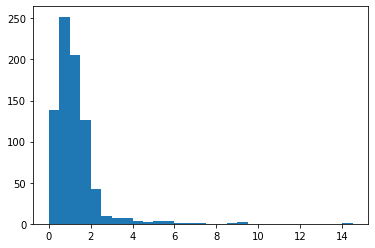

In [97]:
# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)

# Plot the histogram for the height column
plt.hist(data=pokemon, x='height', bins=bins);

## Example 2. Plot the histogram with a changed axis limit.

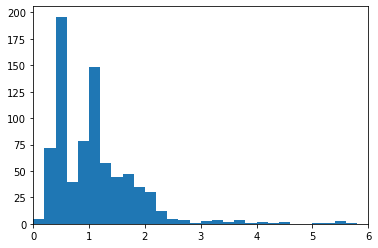

In [98]:
# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins);

# Set the upper and lower bounds of the bins that are displayed in the plot
# Refer here for more information - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
# The argument represent a tuple of the new x-axis limits.
plt.xlim((0,6));

Exampe 3. Plot the above two graphs in a single figure of size 20 x 5 inches, side-by-side.

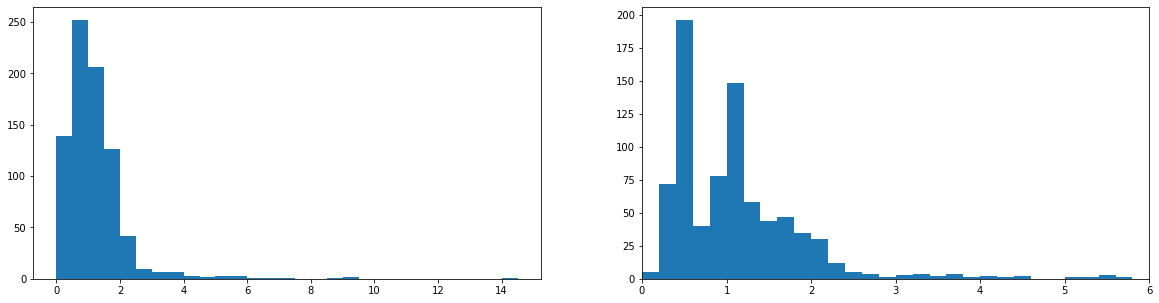

In [101]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, ## Example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data=pokemon, x='height', bins=bins);

# histogram on right, ## Example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins);
plt.xlim((0,6));

# Scales and Transformations

## Example 1 - Scale the x-axis to log-type

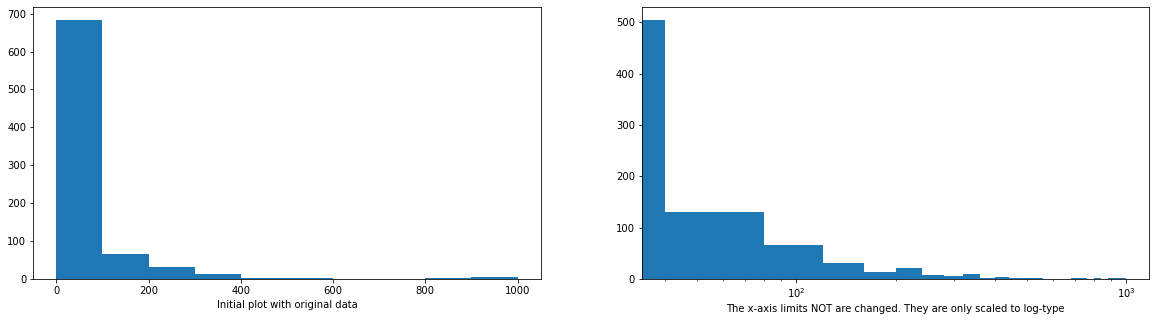

In [109]:
plt.figure(figsize = [20, 5])

# HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1, 2, 1)
plt.hist(data=pokemon, x='weight');
# Display a label on the x-axis
plt.xlabel('Initial plot with original data')

# HISTOGRAM ON RIGHT 
plt.subplot(1, 2, 2)

# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
# Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html
plt.xscale('log')
plt.xlabel('The x-axis limits NOT are changed. They are only scaled to log-type');

In [103]:
# Describe the data
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

## Example 2 - Scale the x-axis to log-type, and change the axis limit.

In [104]:
# Transform the describe() to a scale of log10
# Documentation: [numpy `log10`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html)
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

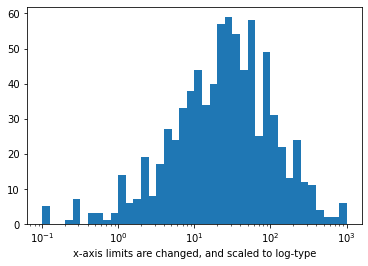

In [106]:
# Axis transformation
# Bin size
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-axis label
# Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, and scaled to log-type');

## Example 3 - Scale the x-axis to log-type, change the axis limits, and increase the x-ticks

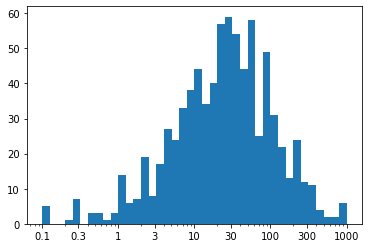

In [107]:
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);

## Example 4. Custom scaling the given data Series, instead of using the built-in log scale

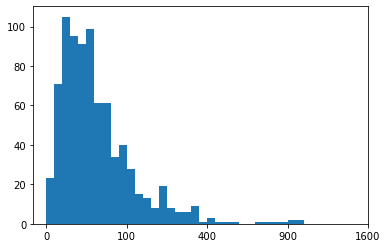

In [108]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));

# Kernel Density Estimation

## Example 1. Plot the Kernel Density Estimation (KDE)

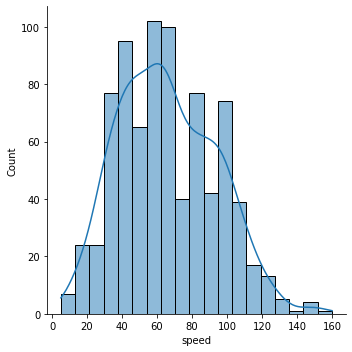

In [ ]:
# Use this new function only with Seaborn 0.11.0 and above. 
# The kind argument can take any one value from {“hist”, “kde”, “ecdf”}.
sb.displot(pokemon['speed'], kind='hist', kde=True);
# Use the 'kde' kind for kernel density estimation
# sb.displot(pokemon['speed'], kind='kde');